# Python notebook for Salary predicted Model

## Step 1: Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_science=pd.read_csv("datascience.csv")
data_science_specialist=pd.read_csv("datasciencespecialist.csv")
data_analyst=pd.read_csv("dataanalyst.csv")
machine_learning=pd.read_csv("machinelearning.csv")
ai=pd.read_csv("ai.csv")

In [3]:
Final_df = pd.concat([data_science, data_science_specialist, data_analyst, machine_learning, ai], axis = 0).drop_duplicates()

In [4]:
Final_df.shape

(1967, 6)

In [5]:
Final_df.head(10)

,Title,Location,Company,Salary,Sponsored,Description
0,Data Science Accelerator,"Pune, Maharashtra",bp,None,Organic,Share\n\nIndia - Maharashtra - Pune\n\nData Sc...
1,Data Engineer,"Bengaluru, Karnataka",Levi Strauss & Co.,None,Organic,"JOB DESCRIPTION\nAt Levi Strauss & Co, we are ..."
2,Data Scientist,"Bengaluru, Karnataka",Adecco Group Internal,None,Organic,SUMMARY:\nThe Data Scientist works as a part o...
3,Data Analytics part time job/internship at Mul...,"Chennai, Tamil Nadu",Enerjazz,"₹5,000 - ₹10,000 a month",Organic,About the company:\nWe are a green energy star...
4,Jr. Data scientist,"Chennai, Tamil Nadu",Blackstraw,None,Organic,About the job :\nResponsibilities :\nResponsib...
5,"Data Science Analyst - R, Python",India,Larsen & Toubro Infotech Limited,None,Organic,Key Responsibilities • Development of statisti...
6,Data Analyst,"New Delhi, Delhi",MedTourEasy,"₹7,00,000 a year",Organic,We are looking for a passionate certified Data...
7,Fresher/Junior Data Science Developer,"Chennai, Tamil Nadu",HTC Global Services Limited,"₹20,000 a month",Organic,HTC Global Services hiring freshers for Junior...
8,Data Science Internship,"Chennai, Tamil Nadu",SIMPLIFAID PVT LTD,"₹15,000 a month",Organic,About the company:\nWe are into building produ...
9,Machine Learning Internship,"Chennai, Tamil Nadu",E-con Systems India Private Limited,"₹20,000 a month",Organic,About the company:\ne-con Systems is a product...


In [6]:
Final_df_sal=Final_df[Final_df['Salary']!= 'None']

In [7]:
Final_df_sal

,Title,Location,Company,Salary,Sponsored,Description
3,Data Analytics part time job/internship at Mul...,"Chennai, Tamil Nadu",Enerjazz,"₹5,000 - ₹10,000 a month",Organic,About the company:\nWe are a green energy star...
6,Data Analyst,"New Delhi, Delhi",MedTourEasy,"₹7,00,000 a year",Organic,We are looking for a passionate certified Data...
7,Fresher/Junior Data Science Developer,"Chennai, Tamil Nadu",HTC Global Services Limited,"₹20,000 a month",Organic,HTC Global Services hiring freshers for Junior...
8,Data Science Internship,"Chennai, Tamil Nadu",SIMPLIFAID PVT LTD,"₹15,000 a month",Organic,About the company:\nWe are into building produ...
9,Machine Learning Internship,"Chennai, Tamil Nadu",E-con Systems India Private Limited,"₹20,000 a month",Organic,About the company:\ne-con Systems is a product...
...,...,...,...,...,...,...
596,Openings in Machine Learning,"Mumbai, Maharashtra",ICS Consultancy Services,"₹10,00,000 - ₹25,00,000 a year",Organic,Roles and responsibilities for Openings in Mac...
649,"Professors, Researchers, Mentors","Bengaluru, Karnataka",Dept of CSE,"₹50,000 - ₹1,50,000 a month",Organic,"Openings for Professors, Associate Professors,..."
667,Software Developer Software Engineer Software ...,"Noida, Uttar Pradesh",Aine Ai Infotech,"₹3,50,000 - ₹6,10,000 a year",Organic,Development and delivery of parts of software ...
679,Job Opening for Artificial Intelligence,India,ICS Consultancy Services,"₹10,00,000 - ₹25,00,000 a year",Organic,Roles and responsibilities for Job Opening for...


In [8]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


Final_df_salary = Final_df[Final_df["Salary"]!= "None"].dropna()
Final_df_salary = Final_df_salary.apply(format_salary,axis=1) 

Final_df_salary["salary_min"] = pd.to_numeric(Final_df_salary["salary_min"],'coerce')
Final_df_salary["salary_max"] = pd.to_numeric(Final_df_salary["salary_max"],'coerce')

Final_df_salary["salary_min"].mean()

567750.3101604278

In [43]:
Final_df_salary['avg_salary'] = (Final_df_salary.salary_min+Final_df_salary.salary_max)/2

In [44]:
Final_df_salary

,Title,Location,Company,Salary,Sponsored,Description,salary_min,salary_max,python_sk,spark_sk,...,machine_sk,deep_sk,statistics_sk,sql_sk,tensorflow_sk,job_simp1,seniority,loc_simp1,desc_len,avg_salary
3,Data Analytics part time job/internship at Mul...,"Chennai, Tamil Nadu",Enerjazz,"₹5,000 - ₹10,000 a month",Organic,About the company:\nWe are a green energy star...,60000.0,120000.0,0,0,...,0,0,0,0,0,na,intern,Chennai,1175,90000.0
6,Data Analyst,"New Delhi, Delhi",MedTourEasy,"₹7,00,000 a year",Organic,We are looking for a passionate certified Data...,700000.0,700000.0,0,0,...,0,0,1,1,0,data analyst,na,Delhi,1875,700000.0
7,Fresher/Junior Data Science Developer,"Chennai, Tamil Nadu",HTC Global Services Limited,"₹20,000 a month",Organic,HTC Global Services hiring freshers for Junior...,240000.0,240000.0,1,0,...,0,0,1,0,0,na,na,Chennai,2959,240000.0
8,Data Science Internship,"Chennai, Tamil Nadu",SIMPLIFAID PVT LTD,"₹15,000 a month",Organic,About the company:\nWe are into building produ...,180000.0,180000.0,1,0,...,1,1,0,0,0,na,intern,Chennai,1836,180000.0
9,Machine Learning Internship,"Chennai, Tamil Nadu",E-con Systems India Private Limited,"₹20,000 a month",Organic,About the company:\ne-con Systems is a product...,240000.0,240000.0,0,0,...,1,0,0,0,1,mle,intern,Chennai,1413,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Openings in Machine Learning,"Mumbai, Maharashtra",ICS Consultancy Services,"₹10,00,000 - ₹25,00,000 a year",Organic,Roles and responsibilities for Openings in Mac...,1000000.0,2500000.0,0,0,...,1,1,0,0,0,mle,na,Mumbai,1320,1750000.0
649,"Professors, Researchers, Mentors","Bengaluru, Karnataka",Dept of CSE,"₹50,000 - ₹1,50,000 a month",Organic,"Openings for Professors, Associate Professors,...",600000.0,1800000.0,0,0,...,0,0,0,0,0,na,na,Bengaluru,711,1200000.0
667,Software Developer Software Engineer Software ...,"Noida, Uttar Pradesh",Aine Ai Infotech,"₹3,50,000 - ₹6,10,000 a year",Organic,Development and delivery of parts of software ...,350000.0,610000.0,0,0,...,0,0,0,0,0,na,na,Noida,605,480000.0
679,Job Opening for Artificial Intelligence,India,ICS Consultancy Services,"₹10,00,000 - ₹25,00,000 a year",Organic,Roles and responsibilities for Job Opening for...,1000000.0,2500000.0,1,0,...,1,1,0,0,0,na,na,na,1605,1750000.0


In [10]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize

from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Neema
[nltk_data]     MV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Neema
[nltk_data]     MV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:

def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [12]:

stop_words = stopwords.words('english')

tags_Final_df_salary = Final_df_salary["Description"].apply(cleanData)

In [13]:
from collections import Counter
result = tags_Final_df_salary.apply(Counter).sum().items()

In [14]:
result

dict_items([('company', 193), ('green', 2), ('energy', 20), ('startup', 23), ('based', 68), ('amsterdam', 1), ('funded', 3), ('founder', 4), ('iit', 2), ('operate', 8), ('delhi', 5), ('ncr', 1), ('india', 48), ('selected', 21), ('intern', 22), ('responsibilities', 134), ('include', 52), ('build', 72), ('optimize', 16), ('databases', 31), ('battery', 1), ('testing', 76), ('system', 42), ('analyze', 30), ('correlate', 1), ('test', 76), ('data', 645), ('work', 466), ('coding', 14), ('iot', 10), ('product', 114), ('apply', 89), ('students', 25), ('freshers', 27), ('available', 65), ('part', 60), ('time', 103), ('may', 36), ('home', 23), ('online', 41), ('relevant', 62), ('skills', 380), ('interests', 19), ('start', 34), ('duration', 19), ('months', 19), ('already', 20), ('graduated', 18), ('currently', 21), ('year', 202), ('study', 22), ('females', 18), ('willing', 27), ('career', 49), ('also', 77), ('requirements', 140), ('must', 100), ('graduate', 24), ('student', 5), ('pursuing', 2), ('

In [15]:
result = sorted(result, key=lambda kv: kv[1],reverse=True)

In [16]:
result_series = pd.Series({k: v for k, v in result})

In [17]:
# creating colums for the most used skills
Final_df_salary['python_sk']=Final_df_salary['Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
Final_df_salary.python_sk.value_counts()
#R studio
Final_df_salary['spark_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
Final_df_salary.spark_sk.value_counts()
#Tableau
Final_df_salary['tableau_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
Final_df_salary.tableau_sk.value_counts()
#aws
Final_df_salary['aws_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
Final_df_salary.aws_sk.value_counts()
#excel
Final_df_salary['excel_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
Final_df_salary.excel_sk.value_counts()
#power
Final_df_salary['power_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'power' in x.lower() else 0)
Final_df_salary.power_sk.value_counts()
#numpy
Final_df_salary['numpy_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'numpy' in x.lower() else 0)
Final_df_salary.numpy_sk.value_counts()
#opencv
Final_df_salary['opencv_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'opencv' in x.lower() else 0)
Final_df_salary.opencv_sk.value_counts()
#pandas
Final_df_salary['pandas_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'pandas' in x.lower() else 0)
Final_df_salary.pandas_sk.value_counts()
#nltk
Final_df_salary['nltk_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'nltk' in x.lower() else 0)
Final_df_salary.nltk_sk.value_counts()
#machine 
Final_df_salary['machine_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'machine' in x.lower() else 0)
Final_df_salary.machine_sk.value_counts()
#deep
Final_df_salary['deep_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'deep' in x.lower() else 0)
Final_df_salary.deep_sk.value_counts()
#statistics
Final_df_salary['statistics_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'statistics' in x.lower() else 0)
Final_df_salary.statistics_sk.value_counts()
#sql
Final_df_salary['sql_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
Final_df_salary.sql_sk.value_counts()
#tensorflow
Final_df_salary['tensorflow_sk'] = Final_df_salary['Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)
Final_df_salary.tensorflow_sk.value_counts()



0    173
1     18
Name: tensorflow_sk, dtype: int64

In [18]:
Final_df_salary.head(10)

,Title,Location,Company,Salary,Sponsored,Description,salary_min,salary_max,python_sk,spark_sk,...,power_sk,numpy_sk,opencv_sk,pandas_sk,nltk_sk,machine_sk,deep_sk,statistics_sk,sql_sk,tensorflow_sk
3,Data Analytics part time job/internship at Mul...,"Chennai, Tamil Nadu",Enerjazz,"₹5,000 - ₹10,000 a month",Organic,About the company:\nWe are a green energy star...,60000.0,120000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Data Analyst,"New Delhi, Delhi",MedTourEasy,"₹7,00,000 a year",Organic,We are looking for a passionate certified Data...,700000.0,700000.0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,Fresher/Junior Data Science Developer,"Chennai, Tamil Nadu",HTC Global Services Limited,"₹20,000 a month",Organic,HTC Global Services hiring freshers for Junior...,240000.0,240000.0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,Data Science Internship,"Chennai, Tamil Nadu",SIMPLIFAID PVT LTD,"₹15,000 a month",Organic,About the company:\nWe are into building produ...,180000.0,180000.0,1,0,...,1,0,0,0,0,1,1,0,0,0
9,Machine Learning Internship,"Chennai, Tamil Nadu",E-con Systems India Private Limited,"₹20,000 a month",Organic,About the company:\ne-con Systems is a product...,240000.0,240000.0,0,0,...,0,0,0,0,0,1,0,0,0,1
12,Data Science Internship,"Bengaluru, Karnataka",OTO Capital,"₹12,000 a month",Organic,About the company:\nIn the recent years - cons...,144000.0,144000.0,1,0,...,0,0,0,0,0,1,0,0,1,0
19,Machine Learning Engineer Intern (Image Recogn...,"Bengaluru, Karnataka","Kaleidoscope Business Solutions, Inc","₹25,000 - ₹45,000 a month",Organic,Job Summary\nThe Machine Learning Engineer Int...,300000.0,540000.0,1,0,...,1,0,1,0,0,1,1,1,0,1
20,"Online Trainer - Python, ML, Data Science","Coimbatore, Tamil Nadu",Nowa Labs,"₹1,000 an hour",Organic,"We are looking for a trainer in Python, Data S...",NaN,NaN,1,0,...,0,1,0,1,0,1,0,0,0,0
21,AI and Deep Learning Trainer,"Bengaluru, Karnataka",Perceptrons,"₹20,000 - ₹40,000 a month",Organic,Job Description:\n1. Good domain knowledge on ...,240000.0,480000.0,1,0,...,0,0,0,0,0,1,1,1,1,0
24,Junior Data Scientist/ta,India,WSD Consultant,"₹7,00,000 - ₹15,00,000 a year",Organic,"Junior Data Scientist/ta\nGurgaon, Bangalore, ...",700000.0,1500000.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [172]:
Final_df_salary.to_csv('salary_data_cleaned.csv',index = False)

### Data Analysis
#### Task1: Find companies with highest number of job listenings

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


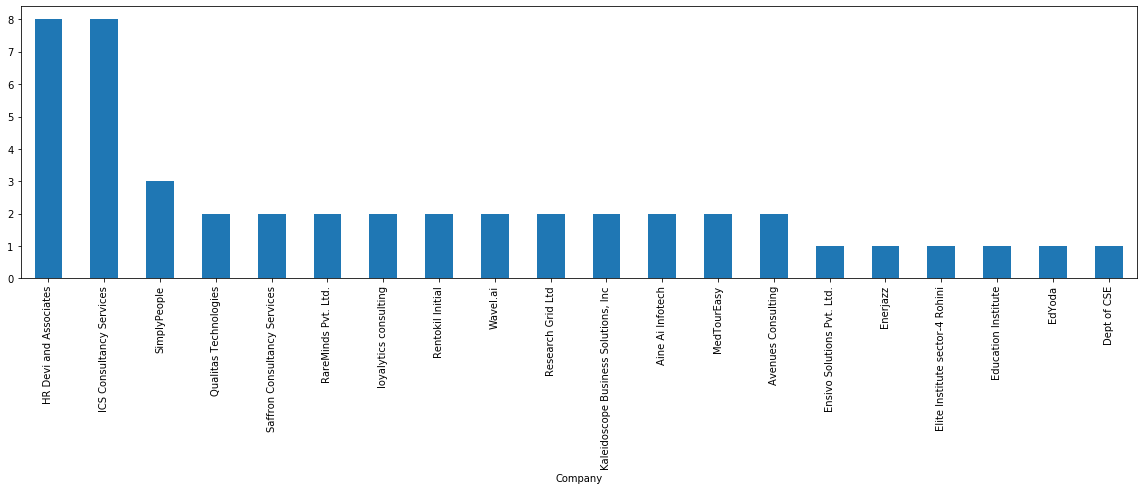

In [19]:
counts = Final_df_sal.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

In [20]:
loc_counts = Final_df_sal.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts

Location
Bengaluru, Karnataka    50
Chennai, Tamil Nadu     23
Mumbai, Maharashtra     20
Pune, Maharashtra       19
Hyderabad, Telangana     9
Noida, Uttar Pradesh     7
Remote                   6
New Delhi, Delhi         6
Delhi, Delhi             5
Gurgaon, Haryana         4
Name: Title, dtype: int64

In [173]:
skills = ["sql", "python", "excel","spark","tensorflow","statistics","machine","deep","neural","predictive","tableau","power","qlik","aws","azure","nltk","pandas","numpy","matplotlib","jupyter","opencv"]





C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


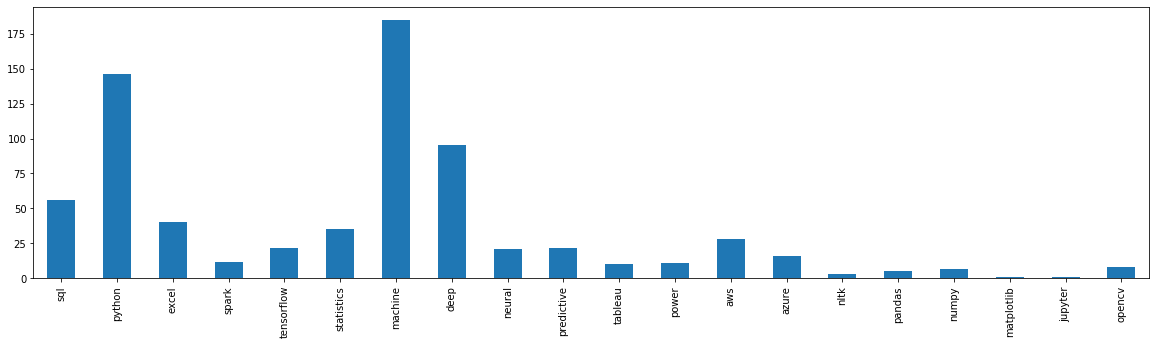

In [174]:
filter_series = result_series.filter(items=skills)
filter_series.plot('bar', figsize=(20,5))

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


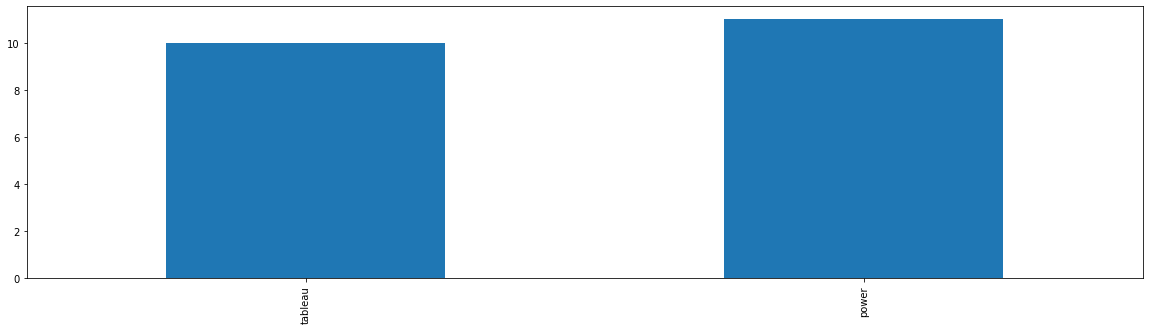

In [23]:
skills1 = ["tableau","power","qlik"]
filter_series = result_series.filter(items=skills1)
filter_series.plot('bar', figsize=(20,5))

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


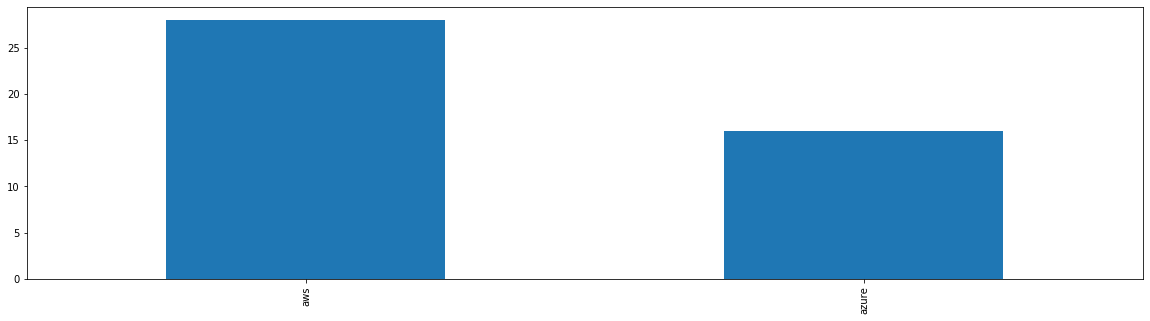

In [24]:
skills2 = ["aws","azure"]
filter_series = result_series.filter(items=skills2)
filter_series.plot('bar', figsize=(20,5))

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


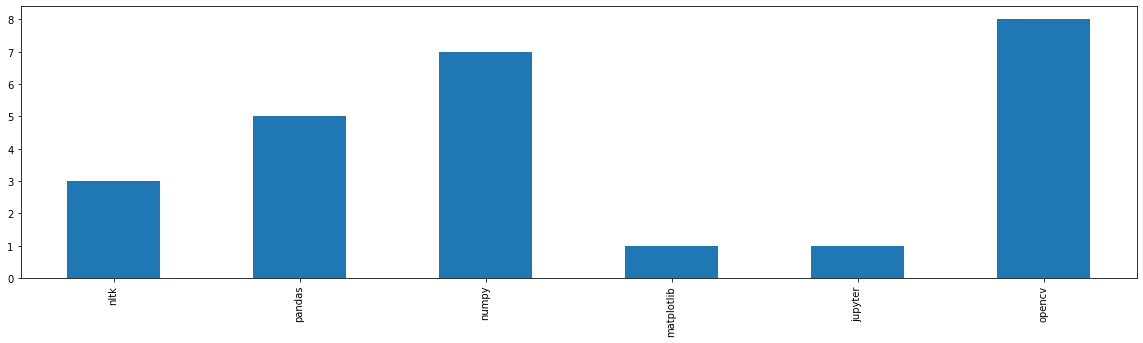

In [25]:
skills3 = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
filter_series = result_series.filter(items=skills3)
filter_series.plot('bar', figsize=(20,5))

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


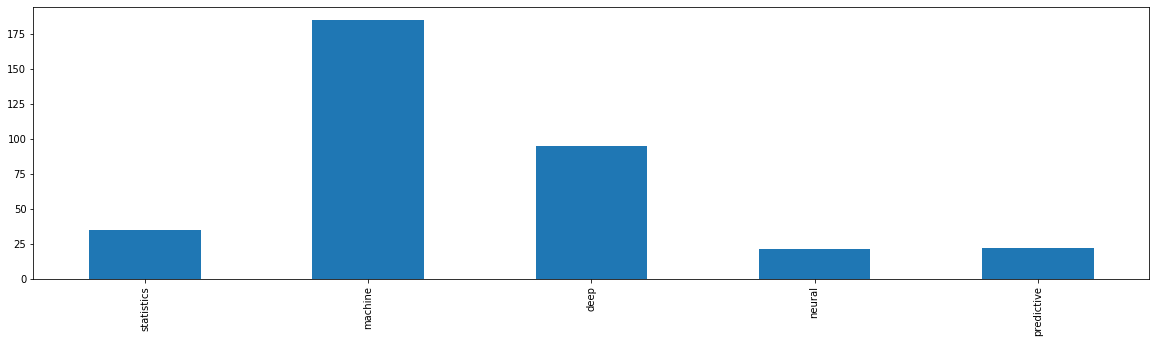

In [26]:
skills4 = ["statistics","machine","deep","neural","predictive"]
filter_series = result_series.filter(items=skills4)
filter_series.plot('bar', figsize=(20,5))

In [27]:
Final_df_salary.columns

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'salary_min', 'salary_max', 'python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk',
       'tensorflow_sk'],
      dtype='object')

In [28]:
Final_df_salary.Title.value_counts()

Data Analyst                                                       15
Data Scientist                                                      9
Business Analyst                                                    6
Software Engineer                                                   3
Machine Learning Engineer                                           3
                                                                   ..
Financial Research Analyst_Renewables Industry_US Based MNC_...     1
Product Sales Execuitve- Consumer Product (FMCG)- Delhi             1
Machine Learning Engineers                                          1
Technical Support Engineer                                          1
C Developer for Financial Domain                                    1
Name: Title, Length: 154, dtype: int64

In [29]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'business analyst' in title.lower():
        return 'ba'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    elif 'intern' in title.lower():
        return 'intern'
    else:
        return 'na'

In [30]:
Final_df_salary['job_simp1'] = Final_df_salary['Title'].apply(title_simplifier)

In [55]:
Final_df_salary['Title'].value_counts()

Data Analyst                                                       15
Data Scientist                                                      9
Business Analyst                                                    6
Software Engineer                                                   3
Machine Learning Engineer                                           3
                                                                   ..
Financial Research Analyst_Renewables Industry_US Based MNC_...     1
Product Sales Execuitve- Consumer Product (FMCG)- Delhi             1
Machine Learning Engineers                                          1
Technical Support Engineer                                          1
C Developer for Financial Domain                                    1
Name: Title, Length: 154, dtype: int64

In [31]:
Final_df_salary.job_simp1.value_counts()

na                116
data analyst       23
mle                20
data scientist     17
ba                  8
data engineer       4
manager             3
Name: job_simp1, dtype: int64

In [32]:
Final_df_salary['seniority'] = Final_df_salary['Title'].apply(seniority)
Final_df_salary.seniority.value_counts()

na        161
intern     20
senior     10
Name: seniority, dtype: int64

In [33]:
Final_df_salary.Location.value_counts()

Bengaluru, Karnataka                  50
Chennai, Tamil Nadu                   23
Mumbai, Maharashtra                   20
Pune, Maharashtra                     19
Hyderabad, Telangana                   9
Noida, Uttar Pradesh                   7
New Delhi, Delhi                       6
Remote                                 6
Delhi, Delhi                           5
Gurgaon, Haryana                       4
Mohali, Punjab                         3
Agra, Uttar Pradesh                    2
Lucknow, Uttar Pradesh                 2
Ahmedabad, Gujarat                     2
Coimbatore, Tamil Nadu                 2
Jaipur, Rajasthan                      2
Nagpur, Maharashtra                    2
India                                  2
Surat, Gujarat                         2
Amritsar, Punjab                       1
Bhubaneshwar, Orissa                   1
Andheri, Mumbai, Maharashtra           1
Keelkattalai, Chennai, Tamil Nadu      1
Kharadi, Pune, Maharashtra             1
Rohini Sub City,

In [34]:
Final_df_salary['Location'].replace('Chennai', 'Chennai',inplace=True)

In [35]:
def location_simplifier(Location):
    if 'bengaluru' in Location.lower():
        return 'Bengaluru'
    elif 'chennai,' in Location.lower():
        return 'Chennai'
    elif 'mumbai,' in Location.lower():
        return 'Mumbai'
    elif 'delhi,' in Location.lower():
        return 'Delhi'
    elif 'pune,' in Location.lower():
        return 'Pune'
    elif 'hyderabad,' in Location.lower():
        return 'Hyderabad'
    elif 'noida,' in Location.lower():
        return 'Noida'
    elif 'gurgaon,' in Location.lower():
        return 'Gurgaon'
    elif 'mohali,' in Location.lower():
        return 'Mohali'
    elif 'surat,' in Location.lower():
        return 'Surat'
    elif 'jaipur,' in Location.lower():
        return 'Jaipur'
    elif 'agra,' in Location.lower():
        return 'Agra'
    elif 'lucknow,' in Location.lower():
        return 'Lucknow'
    elif 'nagpur,' in Location.lower():
        return 'Nagpur'
    elif 'coimbatore,' in Location.lower():
        return 'Coimbatore'
    elif 'ahmedabad,' in Location.lower():
        return 'Ahmedabad'
    else:
        return 'na'

In [36]:
Final_df_salary['loc_simp1'] = Final_df_salary['Location'].apply(location_simplifier)

In [37]:
Final_df_salary.loc_simp1.value_counts()

Bengaluru     52
Chennai       25
na            23
Mumbai        21
Pune          20
Delhi         13
Hyderabad      9
Noida          7
Gurgaon        4
Mohali         3
Agra           2
Lucknow        2
Ahmedabad      2
Surat          2
Coimbatore     2
Nagpur         2
Jaipur         2
Name: loc_simp1, dtype: int64

In [38]:
Final_df_salary.loc_simp1

3        Chennai
6          Delhi
7        Chennai
8        Chennai
9        Chennai
         ...    
596       Mumbai
649    Bengaluru
667        Noida
679           na
708    Bengaluru
Name: loc_simp1, Length: 191, dtype: object

In [45]:
Final_df_salary.columns

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'salary_min', 'salary_max', 'python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk',
       'tensorflow_sk', 'job_simp1', 'seniority', 'loc_simp1', 'desc_len',
       'avg_salary'],
      dtype='object')

In [41]:
#job description length
Final_df_salary['desc_len']=Final_df_salary['Description'].apply(lambda x: len(x))
Final_df_salary['desc_len']

3      1175
6      1875
7      2959
8      1836
9      1413
       ... 
596    1320
649     711
667     605
679    1605
708    3470
Name: desc_len, Length: 191, dtype: int64

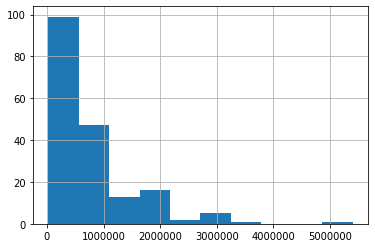

In [46]:
Final_df_salary.avg_salary.hist()

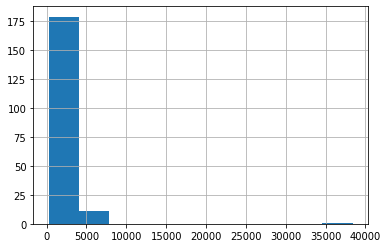

In [47]:
Final_df_salary.desc_len.hist()

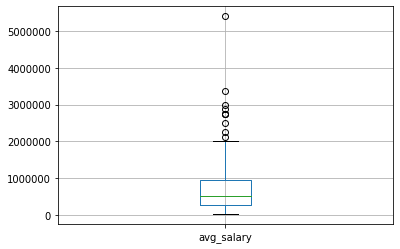

In [50]:
Final_df_salary.boxplot(column = 'avg_salary')

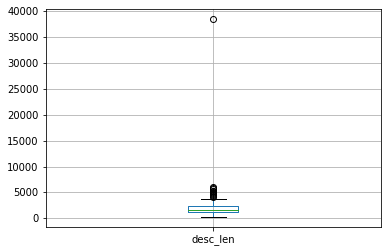

In [51]:
Final_df_salary.boxplot(column = 'desc_len')

In [49]:
Final_df_salary[['avg_salary','desc_len']].corr()

,avg_salary,desc_len
avg_salary,1.000000,0.151189
desc_len,0.151189,1.000000


In [52]:
Final_df_cat = Final_df_salary[['loc_simp1', 'Sponsored', 'python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk',
       'tensorflow_sk', 'job_simp1', 'seniority']]

graph for loc_simp1: total = 17


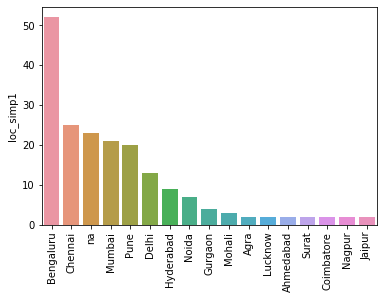

graph for Sponsored: total = 1


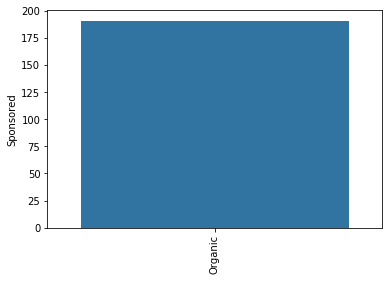

graph for python_sk: total = 2


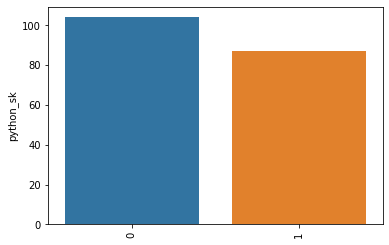

graph for spark_sk: total = 2


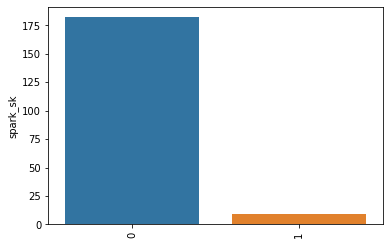

graph for tableau_sk: total = 2


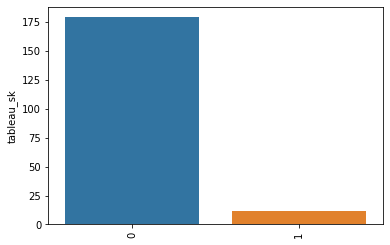

graph for aws_sk: total = 2


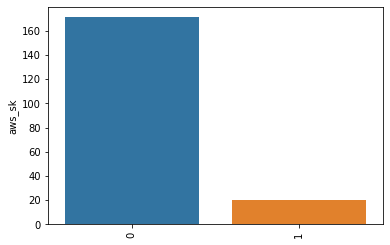

graph for excel_sk: total = 2


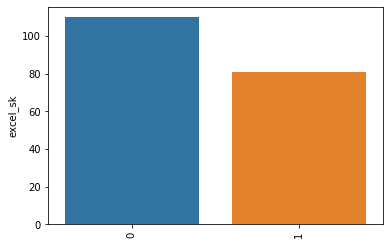

graph for power_sk: total = 2


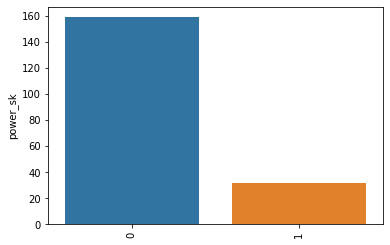

graph for numpy_sk: total = 2


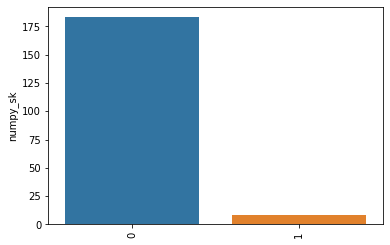

graph for opencv_sk: total = 2


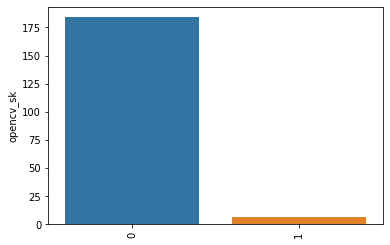

graph for pandas_sk: total = 2


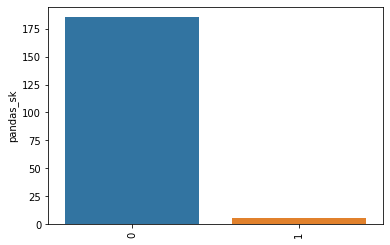

graph for nltk_sk: total = 2


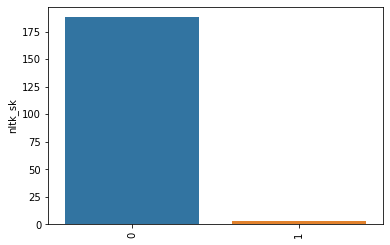

graph for machine_sk: total = 2


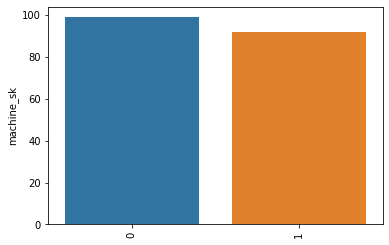

graph for deep_sk: total = 2


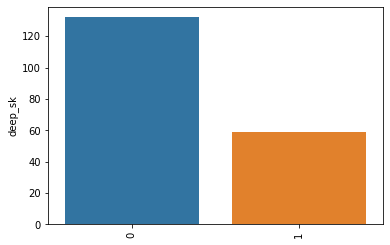

graph for statistics_sk: total = 2


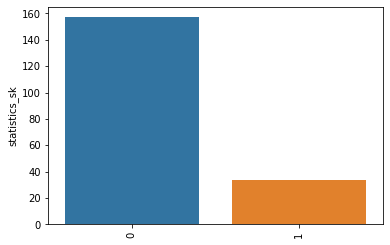

graph for sql_sk: total = 2


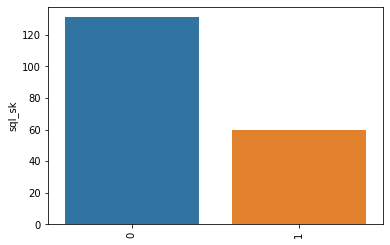

graph for tensorflow_sk: total = 2


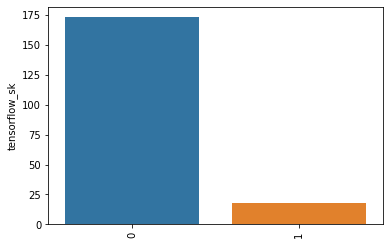

graph for job_simp1: total = 7


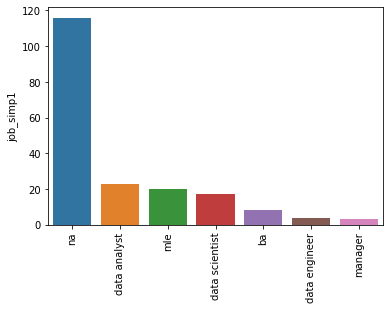

graph for seniority: total = 3


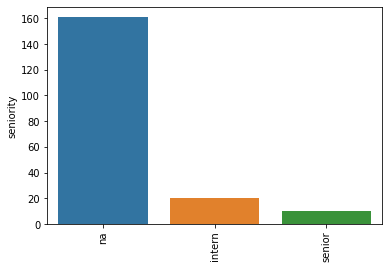

In [54]:

for i in Final_df_cat.columns:
    cat_num = Final_df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [56]:
Final_df_salary.columns

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'salary_min', 'salary_max', 'python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk',
       'tensorflow_sk', 'job_simp1', 'seniority', 'loc_simp1', 'desc_len',
       'avg_salary'],
      dtype='object')

In [57]:
pd.pivot_table(Final_df_salary, index = 'job_simp1', values = 'avg_salary')

,avg_salary
job_simp1,
ba,5.991875e+05
data analyst,5.280854e+05
data engineer,1.427000e+06
data scientist,9.675000e+05
manager,1.150000e+06
mle,1.002500e+06
na,6.940327e+05


In [58]:
pd.pivot_table(Final_df_salary, index = ['job_simp1','seniority'], values = 'avg_salary')

avg_salary
job_simp1      seniority              
ba             na         5.991875e+05
data analyst   intern     3.300000e+05
               na         5.425482e+05
               senior     4.825000e+05
data engineer  na         1.427000e+06
data scientist na         8.486667e+05
               senior     2.750000e+06
manager        na         1.150000e+06
mle            intern     2.175000e+05
               na         1.232000e+06
               senior     7.000000e+05
na             intern     1.076000e+05
               na         7.814337e+05
               senior     8.636667e+05

In [59]:
pd.pivot_table(Final_df_salary, index = ['loc_simp1','job_simp1'], values = 'avg_salary').sort_values('loc_simp1', ascending = False)

avg_salary
loc_simp1  job_simp1                   
na         na              8.278571e+05
           data scientist  1.050000e+06
           data engineer   5.280000e+05
           data analyst    4.700000e+05
           ba              5.000000e+05
Surat      na              4.300000e+05
           data scientist  5.000000e+05
Pune       na              5.653636e+05
           mle             1.127500e+06
           data scientist  1.392500e+06
           data analyst    2.760000e+05
           ba              1.250000e+06
Noida      data scientist  3.500000e+05
           na              4.298000e+05
Nagpur     na              1.950000e+05
Mumbai     na              9.960000e+05
           mle             1.750000e+06
           data engineer   7.000000e+05
           data analyst    4.300000e+05
Mohali     na              1.458667e+06
Lucknow    data scientist  5.400000e+05
           data analyst    1.620000e+05
Jaipur     mle             3.600000e+05
           manager         4.500000e+05
Hyderabad  data scientist  7.500000e+05
           na              1.058500e+06
           data engineer   3.380000e+06
           ba              5.375000e+05
           data analyst    4.500000e+05
Gurgaon    na              1.306250e+06
           mle             1.150000e+06
           data analyst    8.000000e+05
Delhi      na              2.362500e+05
           mle             9.000000e+05
           manager         1.000000e+06
           data scientist  2.000000e+06
           data analyst    7.000000e+05
           ba              5.480000e+05
Coimbatore ba              3.300000e+05
Chennai    manager         2.000000e+06
           data analyst    6.512500e+05
           na              5.111053e+05
           mle             2.400000e+05
Bengaluru  na              7.212375e+05
           mle             5.914286e+05
           data scientist  1.045000e+06
           data engineer   1.100000e+06
           data analyst    7.392410e+05
           ba              6.000000e+05
Ahmedabad  ba              4.800000e+05
           data scientist  4.800000e+05
Agra       na              1.750000e+05
           data analyst    3.600000e+05

In [61]:
from wordcloud import WordCloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

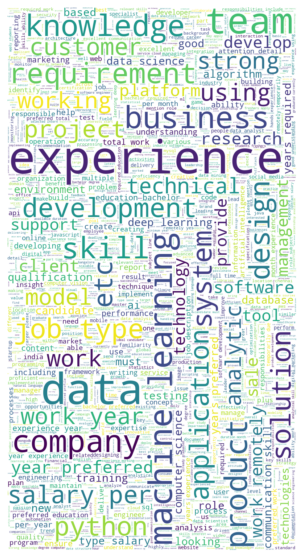

In [63]:
words = " ".join(Final_df_salary['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

## Model building

In [64]:
# choose relevant columns 
Final_df_salary.columns

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'salary_min', 'salary_max', 'python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk',
       'tensorflow_sk', 'job_simp1', 'seniority', 'loc_simp1', 'desc_len',
       'avg_salary'],
      dtype='object')

In [90]:
df_model = Final_df_salary[['job_simp1', 'loc_simp1','desc_len','avg_salary','python_sk', 'spark_sk', 'tableau_sk',
       'aws_sk', 'excel_sk', 'power_sk', 'numpy_sk', 'opencv_sk', 'pandas_sk',
       'nltk_sk', 'machine_sk', 'deep_sk', 'statistics_sk', 'sql_sk','tensorflow_sk','seniority']]

In [91]:
df_model.dtypes

job_simp1         object
loc_simp1         object
desc_len           int64
avg_salary       float64
python_sk          int64
spark_sk           int64
tableau_sk         int64
aws_sk             int64
excel_sk           int64
power_sk           int64
numpy_sk           int64
opencv_sk          int64
pandas_sk          int64
nltk_sk            int64
machine_sk         int64
deep_sk            int64
statistics_sk      int64
sql_sk             int64
tensorflow_sk      int64
seniority         object
dtype: object

In [92]:
df_model.describe()

,desc_len,avg_salary,python_sk,spark_sk,tableau_sk,aws_sk,excel_sk,power_sk,numpy_sk,opencv_sk,pandas_sk,nltk_sk,machine_sk,deep_sk,statistics_sk,sql_sk,tensorflow_sk
count,191.000000,1.840000e+02,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2085.235602,7.498427e+05,0.455497,0.047120,0.062827,0.104712,0.424084,0.167539,0.041885,0.036649,0.031414,0.015707,0.481675,0.308901,0.178010,0.314136,0.094241
std,2861.989255,7.456842e+05,0.499324,0.212453,0.243290,0.306987,0.495502,0.374438,0.200852,0.188393,0.174891,0.124665,0.500977,0.463254,0.383527,0.465391,0.292931
min,244.000000,2.400000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,2.670000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1611.000000,5.140000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2355.500000,9.615000e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,38428.000000,5.400000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df_model.fillna(-99999, inplace=True)

C:\Users\Neema MV\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [106]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [107]:
# train test split 
from sklearn.model_selection import train_test_split

In [108]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [122]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 617892.7904317603
Coefficients: 
 [ 1.13783497e+01 -1.08005517e+05  3.70431899e+05 -1.76424640e+05
 -1.30390978e+05 -1.00305936e+04  7.99143129e+04  7.56927897e+03
  5.91147843e+04 -2.76619679e+05  8.17589497e+05 -1.26506427e+05
  2.17723283e+05  6.32621059e+04  9.15932371e+04 -1.55329726e+05
 -1.53463638e+05 -3.98010578e+05  2.49337601e+05  3.29593352e+04
  1.48462724e+05  2.55301429e+05 -1.34586874e+05 -3.30695306e+05
 -7.18019040e+04  1.63214687e+05  6.69267912e+04 -2.31916725e+05
 -1.54085474e+05  4.52547558e+05  4.86773003e+05 -6.01918919e+05
 -2.53773791e+05  9.03879794e+05  3.46499979e+05 -4.72934644e+05
 -1.91159490e+05  5.50850706e+04 -2.80190659e+05  1.13550029e+05
 -4.76327468e+05  1.18294000e+05  3.58033468e+05]


In [124]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

C:\Users\Neema MV\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.421
Date:                Wed, 26 Aug 2020   Prob (F-statistic):             0.0688
Time:                        00:52:55   Log-Likelihood:                -2823.4
No. Observations:                 191   AIC:                             5729.
Df Residuals:                     150   BIC:                             5862.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [125]:
# significant insights
# Hydrebad, Mohali & mumbai tend to pay more here 
# by seniority - pay gets more


In [138]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-610270.5642774961

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14571885242694.89, tolerance: 9523167237.2532
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315489844390.47656, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182676186712.371, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799332694625.094, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315316441508.60156, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182296023303.0273, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182365226270.801, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799459883988.789, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315349986358.33203, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799586918413.547, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315383475002.90234, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182443390603.1133, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315416907344.45703, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182516698451.2812, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799721722533.344, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315450283424.45703, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182589756109.2812, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799848437037.707, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315483603205.3281, tolerance: 4807768294.985731
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182662563131.3203, tolerance: 7415221562.048007
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7799974996194.09, tolerance: 6712360272.092872
  positive)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

,alpha,error
98,0.99,-612127.538931


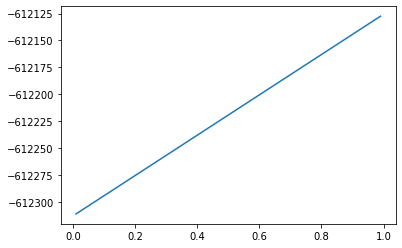

In [127]:

# lasso regression 
lm_l = Lasso(alpha=.99)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


In [128]:
####################### Ensemble Technique #############################

In [129]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [130]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))


gbmTree on training 0.6801450378149647
gbmTree on test data  -0.021757354454031264


In [158]:
np.mean(cross_val_score(gbmTree,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-532015.6965488902

In [131]:
bgcl = BaggingRegressor(n_estimators=100, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))

bgcl on train data  0.821947384539112
bgcl on test data  -0.020133361276752026


In [159]:
np.mean(cross_val_score(bgcl,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-551631.2010640522

In [133]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-580033.0933071895

In [160]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(gbmTree,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)



C:\Users\Neema MV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50,
                                                 n_iter_...one,
                         

In [161]:
gs.best_score_

-459118.74323791685

In [162]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=90,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_gbm = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)


440621.2598586464

In [169]:
mean_absolute_error(y_test,tpred_lml)

445934.8507877226

In [170]:
mean_absolute_error(y_test,tpred_gbm)

337453.71078170766

In [171]:
mean_absolute_error(y_test,(tpred_lm+tpred_gbm)/2)


361879.3390364313

In [148]:
## Combination of Linear model & Random forest gives least error